In [1]:
import ROOT
from ROOT import gStyle
from ROOT import gPad
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.28/00


In [25]:
myFile = ROOT.TFile.Open("/Users/bertabeltran/SMUT/data/waves/4scint_pile_waves/FILTERED/SDataF_4scint_pile_waves.root")

In [26]:
myFile.ls()

TFile**		/Users/bertabeltran/SMUT/data/waves/4scint_pile_waves/FILTERED/SDataF_4scint_pile_waves.root	
 TFile*		/Users/bertabeltran/SMUT/data/waves/4scint_pile_waves/FILTERED/SDataF_4scint_pile_waves.root	
  KEY: TTree	Data_F;1	CoMPASS FILTERED events TTree


In [27]:
myTree = myFile.Data_F

In [28]:
myTree.Print()

******************************************************************************
*Tree    :Data_F    : CoMPASS FILTERED events TTree                          *
*Entries :    83007 : Total =       168591384 bytes  File  Size =   23655148 *
*        :          : Tree compression factor =   7.14                       *
******************************************************************************
*Br    0 :Channel   : Channel/s                                              *
*Entries :    83007 : Total  Size=     166959 bytes  File Size  =      32128 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   5.18     *
*............................................................................*
*Br    1 :Timestamp : Timestamp/l                                            *
*Entries :    83007 : Total  Size=     666443 bytes  File Size  =     335561 *
*Baskets :       21 : Basket Size=      32000 bytes  Compression=   1.98     *
*...................................................

In [29]:
#now I read the Samples branch in the tree
print(myTree.GetEntries())

max_height_chn=[]
max_height_chn.append(ROOT.TH1D("max_height_chn0","max_height_chn0",100,0,600))
max_height_chn[0].Sumw2()
max_height_chn.append(ROOT.TH1D("max_height_chn1","max_height_chn1",100,0,600))
max_height_chn[1].Sumw2()
max_height_chn.append(ROOT.TH1D("max_height_chn2","max_height_chn2",100,0,600))
max_height_chn[2].Sumw2()
max_height_chn.append(ROOT.TH1D("max_height_chn3","max_height_chn3",100,0,600))
max_height_chn[3].Sumw2()

baseline_chn=[]
baseline_chn.append(ROOT.TH1D("baseline_chn0","baseline_chn0",100,130,170))
baseline_chn[0].Sumw2()
baseline_chn.append(ROOT.TH1D("baseline_chn1","baseline_chn1",100,130,170))
baseline_chn[1].Sumw2()
baseline_chn.append(ROOT.TH1D("baseline_chn2","baseline_chn2",100,130,170))
baseline_chn[2].Sumw2()
baseline_chn.append(ROOT.TH1D("baseline_chn3","baseline_chn3",100,130,170))
baseline_chn[3].Sumw2()

energy_scatt_chn=[]
energy_scatt_chn.append(ROOT.TH2D("energy_scatt_chn0","energy_scatt_chn0",100,0,600,100,0,4000))
energy_scatt_chn.append(ROOT.TH2D("energy_scatt_chn1","energy_scatt_chn1",100,0,600,100,0,4000))
energy_scatt_chn.append(ROOT.TH2D("energy_scatt_chn2","energy_scatt_chn2",100,0,600,100,0,4000))
energy_scatt_chn.append(ROOT.TH2D("energy_scatt_chn3","energy_scatt_chn3",100,0,600,100,0,4000))


for entryNum in range(0,myTree.GetEntries()):
#for entryNum in range(0,500):
    myTree.GetEntry(entryNum)
    #going to look for maximun of the Samples, and also calcualte the baseline fromthe first 90 samples 
    maxi=0
    index=0
    baseline=0
    for elem in myTree.Samples:
        if index <80:
            baseline=baseline+elem
            index=index+1
        if elem >maxi: maxi=elem # find the maximun   
    peak_mV=(maxi-(baseline/80.))*0.98  # transform from ADC Counts to mV (1LSB = 0.98 mV)
    baseline_chn[myTree.Channel].Fill(baseline/80.)   
    max_height_chn[myTree.Channel].Fill(peak_mV)
    energy_scatt_chn[myTree.Channel].Fill(peak_mV,myTree.Energy)       


83007


threshold 54.25309049031515
threshold 56.92746367217615
threshold 58.428186415087545
threshold 46.059078304149324
 FCN=27.9276 FROM MIGRAD    STATUS=CONVERGED      81 CALLS          82 TOTAL
                     EDM=4.31434e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.09169e+01   3.19694e-01   2.40632e-04  -1.01301e-02
   2  p1           1.25336e+02   4.37987e-01   3.30387e-04   7.06362e-03
   3  p2           1.25554e+06   1.41421e+00   1.51699e+01   8.63935e-10

****************************************
Minimizer is Linear / Migrad
Chi2                      =      70281.7
NDf                       =          341
p0                        =      149.072   +/-   16.8045     
p1                        =      18.0412   +/-   0.124187    
 FCN=15.6922 FROM MIGRAD    STATUS=CONVERGED      95 CALLS          96 TOTAL
            

Info in <TCanvas::Print>: pdf file /Users/bertabeltran/SMUT/data/PeaksCumulativeChan0.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/bertabeltran/SMUT/data/PeaksCumulativeChan1.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/bertabeltran/SMUT/data/PeaksCumulativeChan2.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/bertabeltran/SMUT/data/PeaksCumulativeChan3.pdf has been created


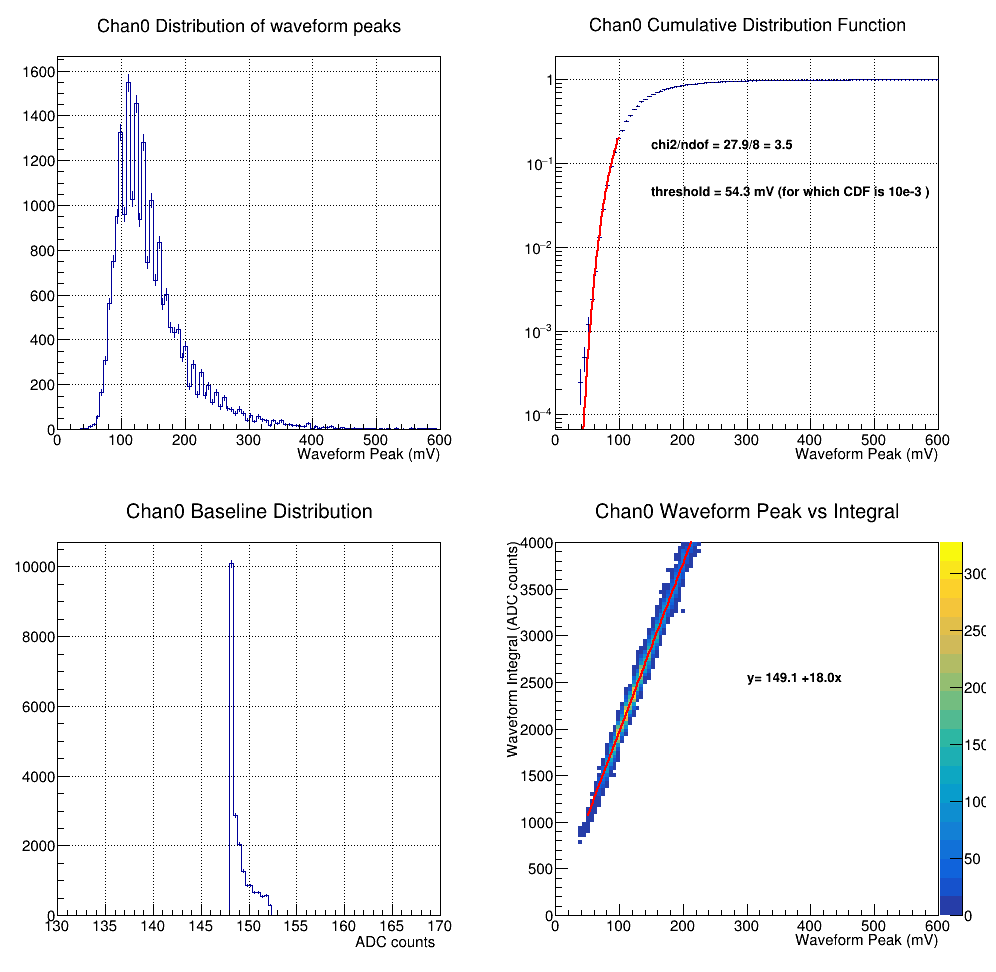

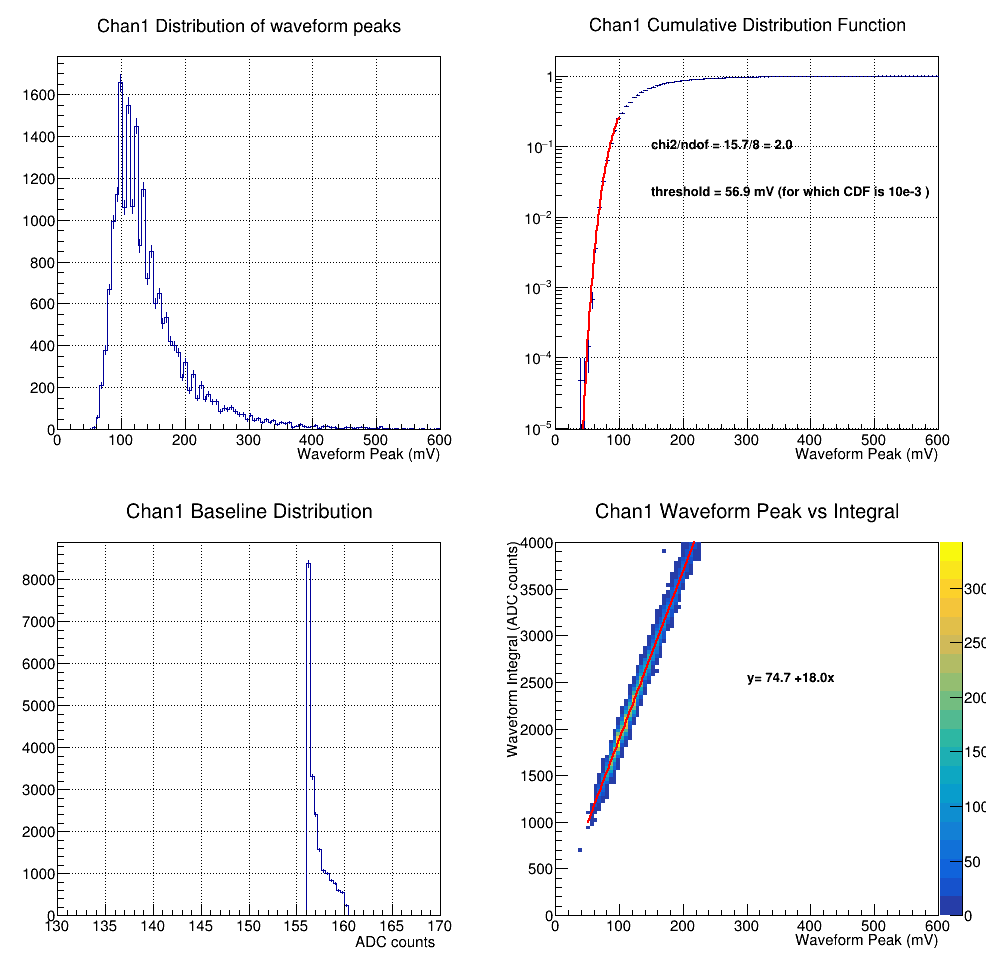

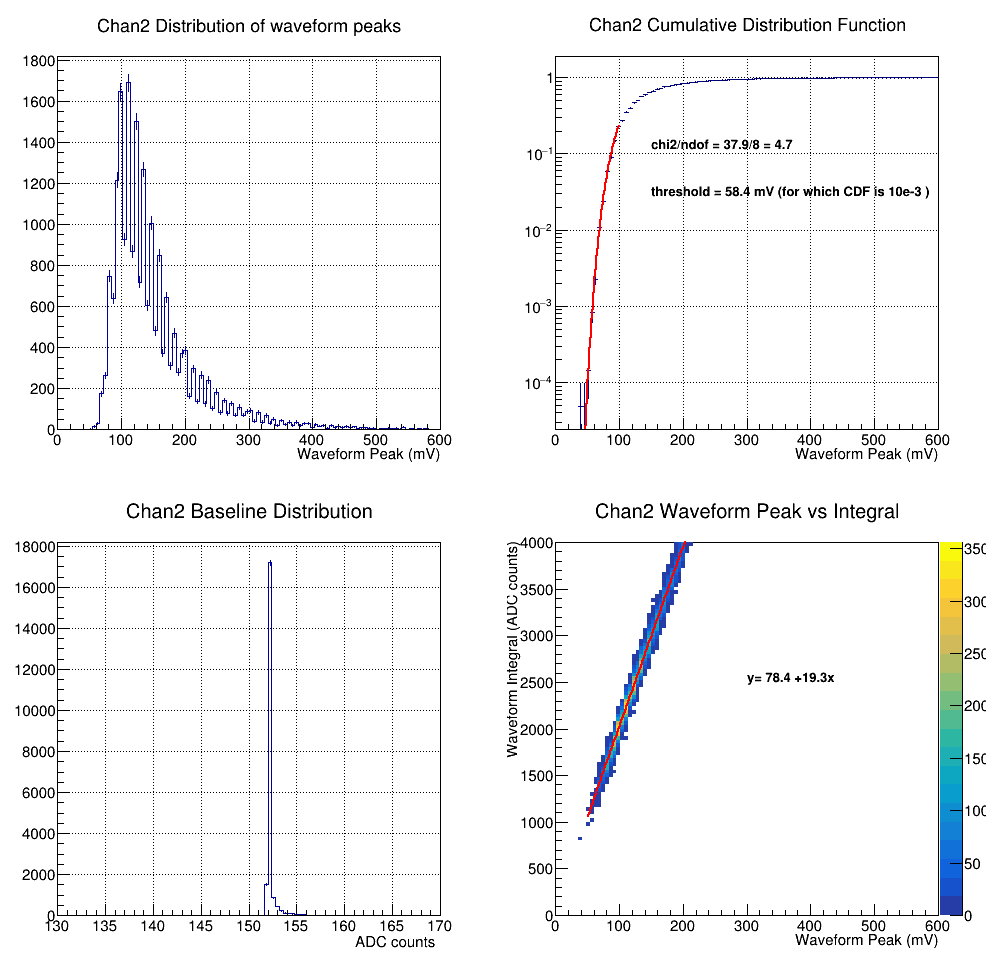

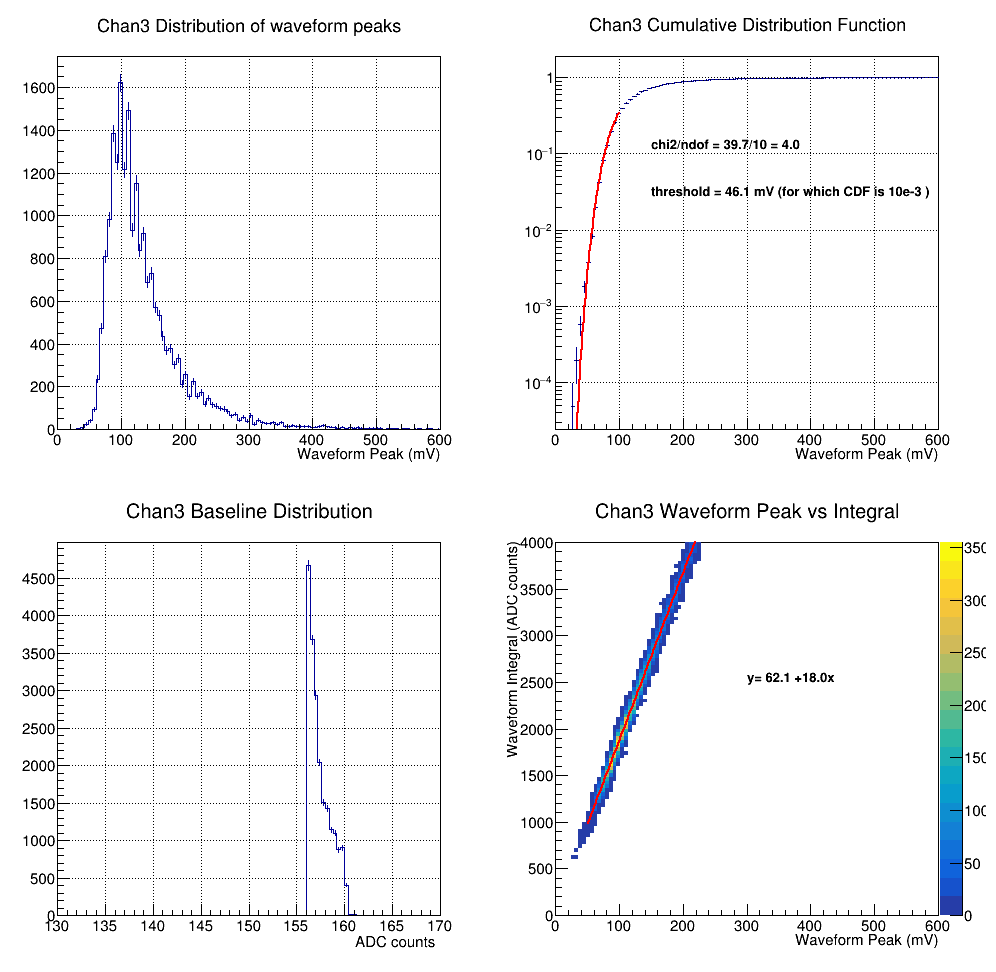

In [61]:
canvas=[]

for chn in range(0,4):
    canvas.append(ROOT.TCanvas("canvas{}".format(chn),"canvas{}".format(chn),1000,1000))
    canvas[chn].Divide(2,2);
    canvas[chn].cd(1);
    gPad.SetGrid();
    max_height_chn[chn].SetTitle("Chan{} Distribution of waveform peaks".format(chn))
    max_height_chn[chn].GetXaxis().SetTitle("Waveform Peak (mV)")
    max_height_chn[chn].Draw("h")

    canvas[chn].cd(2) 
    hist_cumu=max_height_chn[chn].GetCumulative()
    hist_cumu.Scale(1./max_height_chn[chn].Integral())
    # assimetric sigmoid 
    #func = ROOT.TF1("func", "(0.5)*((TMath::Power((1+TMath::Exp((-1/[0])*(x-[1]-[0]*TMath::Log(TMath::Power(2,(1/[2]))-1)))),-[2]))+(1-TMath::Power((1+TMath::Exp((1/[0])*(x-[1]+[0]*TMath::Log(TMath::Power(2,(1/[3]))-1)))),-[3])))", 0, 600) 
    #func.SetParameters(3,120,0.2,0.03)
    # more simple onme 
    func = ROOT.TF1("func", "TMath::Power((1+TMath::Exp((-1/[0])*(x-[1]-[0]*TMath::Log(TMath::Power(2,(1/[2]))-1)))),-[2])", 0, 600) 
    func.SetParameters(30,120,1.25383e+06)
    hist_cumu.Fit(func, "", "",0,100)
    chi2 = func.GetChisquare()
    ndof = func.GetNDF()
    c=func.GetParameter(0)
    xc=func.GetParameter(1)
    dt=func.GetParameter(2)
    # now we define a new fuction with the fitted values so that we can evaluate it 
    func_eval= ROOT.TF1("func_eval", "TMath::Power((1+TMath::Exp((-1/{c})*(x-{xc}-{c}*TMath::Log(TMath::Power(2,(1/{dt}))-1)))),-{dt})".format(c=c,xc=xc,dt=dt), 0, 100) 
    threshold=func_eval.GetX(1e-03)
    print("threshold", threshold)
    
    # plot things 
    gPad.SetLogy(1);
    gPad.SetGrid();
    hist_cumu.SetTitle("Chan{} Cumulative Distribution Function".format(chn))
    hist_cumu.GetYaxis().SetTitleOffset(1)
    #hist_cumu.Draw("histo");
    hist_cumu.Draw();
    # print out values in the canvas 
    # first print info about the fit 
    latex = ROOT.TLatex() 
    latex.SetNDC() 
    latex.SetTextSize(0.03)
    string1="chi2/ndof = %.1f/%d = %.1f"%(chi2,ndof,chi2/ndof)
    latex.DrawText(0.3,0.7,string1)
    latex.DrawText(0.3,0.6,"threshold = %.1f mV (for which CDF is 10e-3 )"%(threshold))
   
    
    canvas[chn].cd(3) 
    gPad.SetGrid();
    baseline_chn[chn].SetTitle("Chan{} Baseline Distribution".format(chn))
    baseline_chn[chn].GetXaxis().SetTitle(" ADC counts ")
    baseline_chn[chn].Draw("h")

    canvas[chn].cd(4) 
    
    energy_scatt_chn[chn].Fit("pol1", "", "",50,300)
    fit_func=energy_scatt_chn[chn].GetFunction("pol1")
    x0=fit_func.GetParameter(0)
    x1=fit_func.GetParameter(1)
    
    energy_scatt_chn[chn].SetTitle("Chan{} Waveform Peak vs Integral".format(chn))
    energy_scatt_chn[chn].GetYaxis().SetTitle(" Waveform Integral (ADC counts)")
    energy_scatt_chn[chn].GetYaxis().SetTitleOffset(1.6)
    energy_scatt_chn[chn].GetXaxis().SetTitle(" Waveform Peak (mV)")
    energy_scatt_chn[chn].Draw("COLZ")
    
    latex4 = ROOT.TLatex() 
    latex4.SetNDC() 
    latex4.SetTextSize(0.03)
    latex4.DrawText(0.5,0.6,"y= %.1f +%0.1fx"%(x0,x1))
   
    


    canvas[chn].Draw()
    canvas[chn].SaveAs("/Users/bertabeltran/SMUT/data/PeaksCumulativeChan{}.pdf".format(chn))